In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import pickle

 

In [11]:

# Load dataset
df = pd.read_csv("bank_customer_data.csv")

 


In [12]:

# Data Preprocessing
## Encode categorical variables
label_encoder = LabelEncoder()
df['Loan Status'] = label_encoder.fit_transform(df['Loan Status'])

 

In [14]:

## Select features for clustering
features = ['Age', 'Annual Income', 'Credit Score', 'Account Balance', 'Monthly Transactions', 'Transaction Volume']
X = df[features]

 


In [15]:

## Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



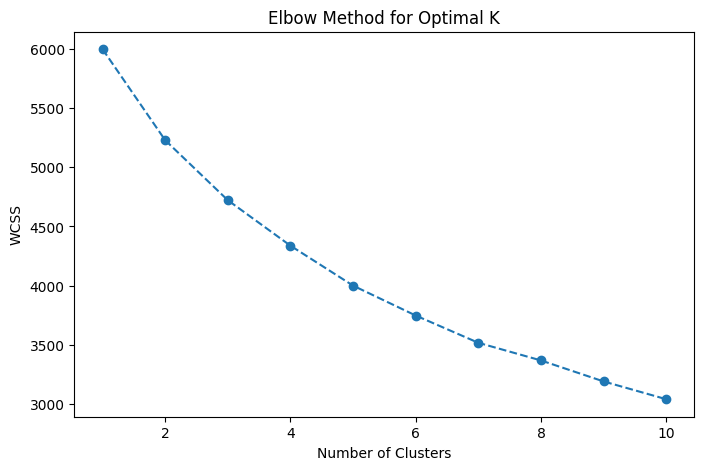

In [16]:

# Determine optimal clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()


In [17]:

# Save the trained model and scaler
with open("kmeans_model.pkl", "wb") as model_file:
    pickle.dump(kmeans, model_file)

with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Model and scaler saved successfully!")


Model and scaler saved successfully!
